# Bankruptcy Prevention

## IMPORTING LIBRARIES

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Exploratory Data Analysis

In [5]:
data=pd.read_excel('Bankruptcy (2).xlsx')
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [6]:
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [7]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.shape

(250, 7)

In [9]:
data['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

## ENCODING

In [11]:
le=LabelEncoder()
data['class']=le.fit_transform(data['class'])
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


## VISUALIZATION

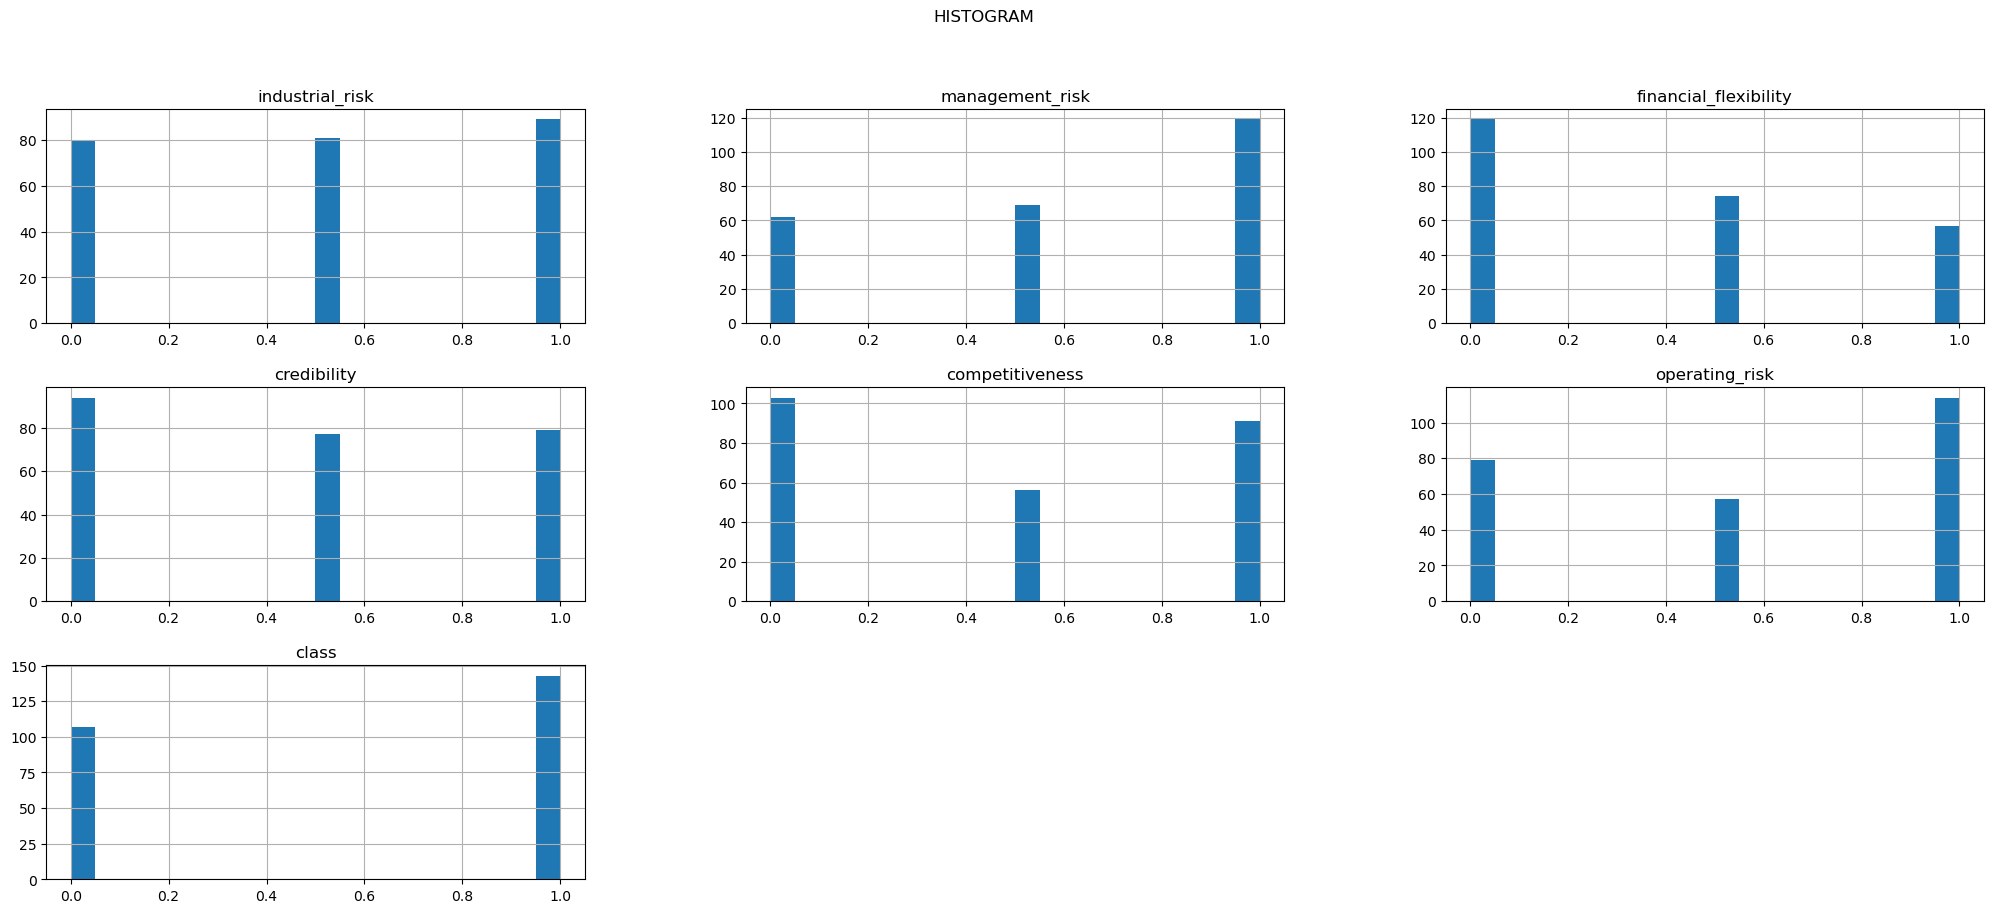

In [13]:
data.hist(bins=20,figsize=(25,10))
plt.suptitle('HISTOGRAM')
plt.show()

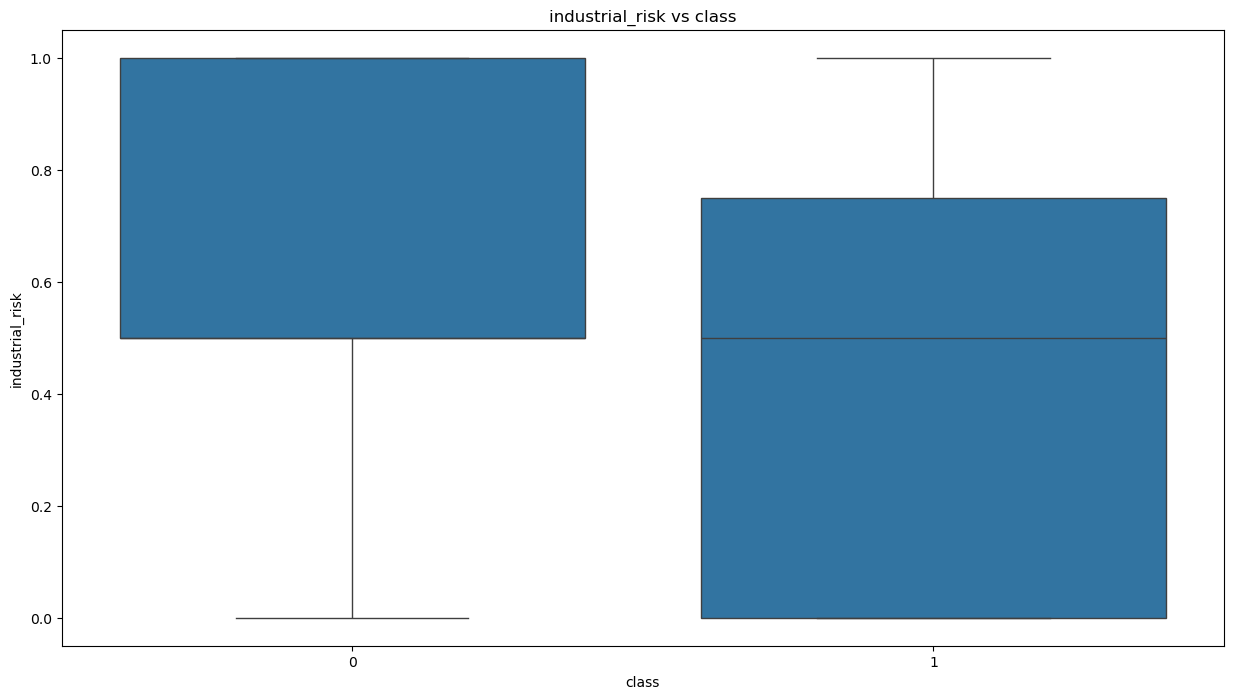

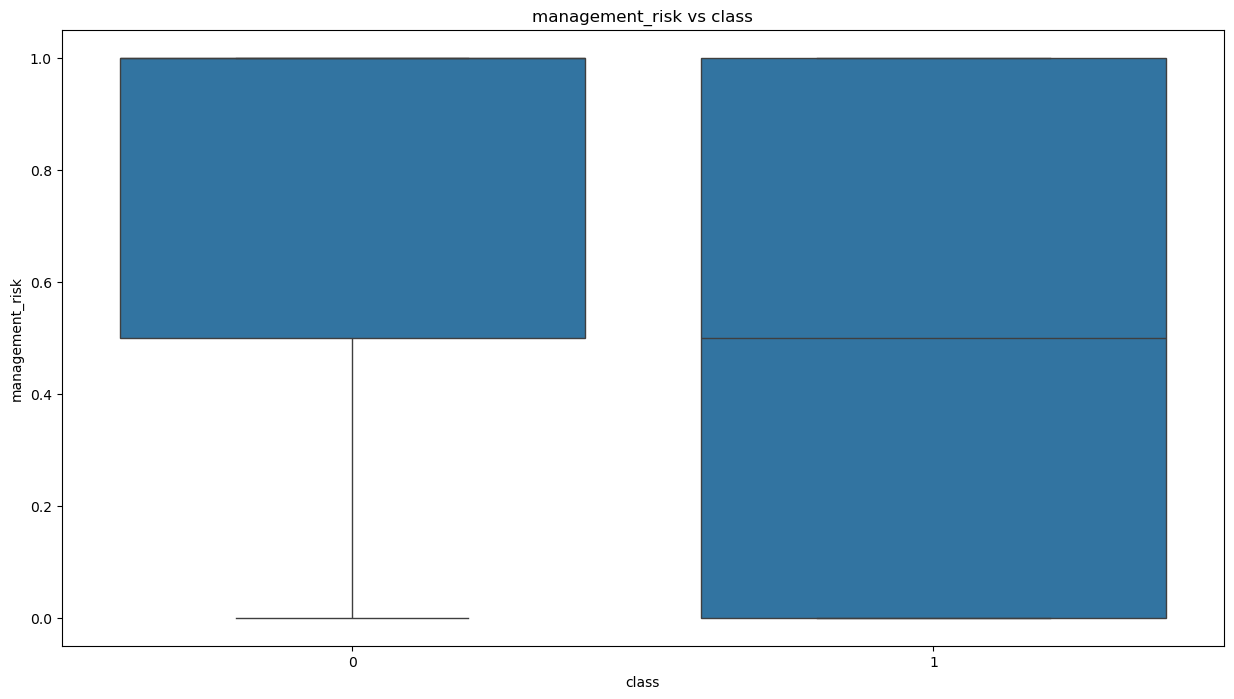

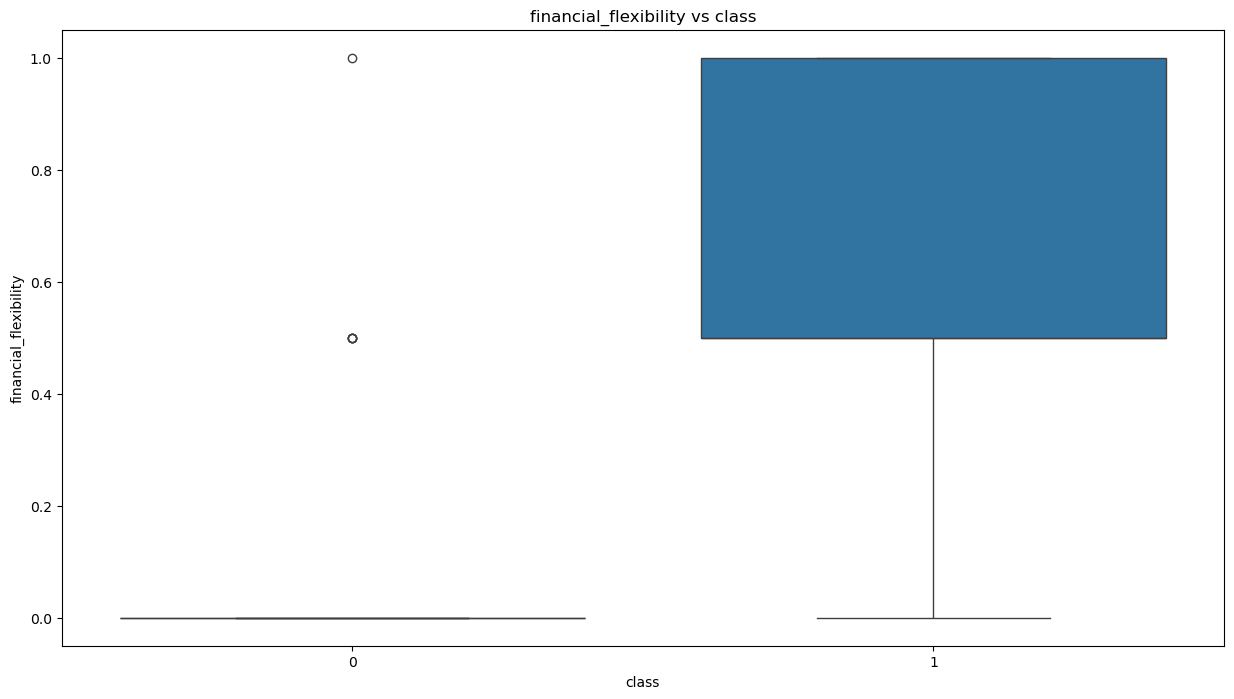

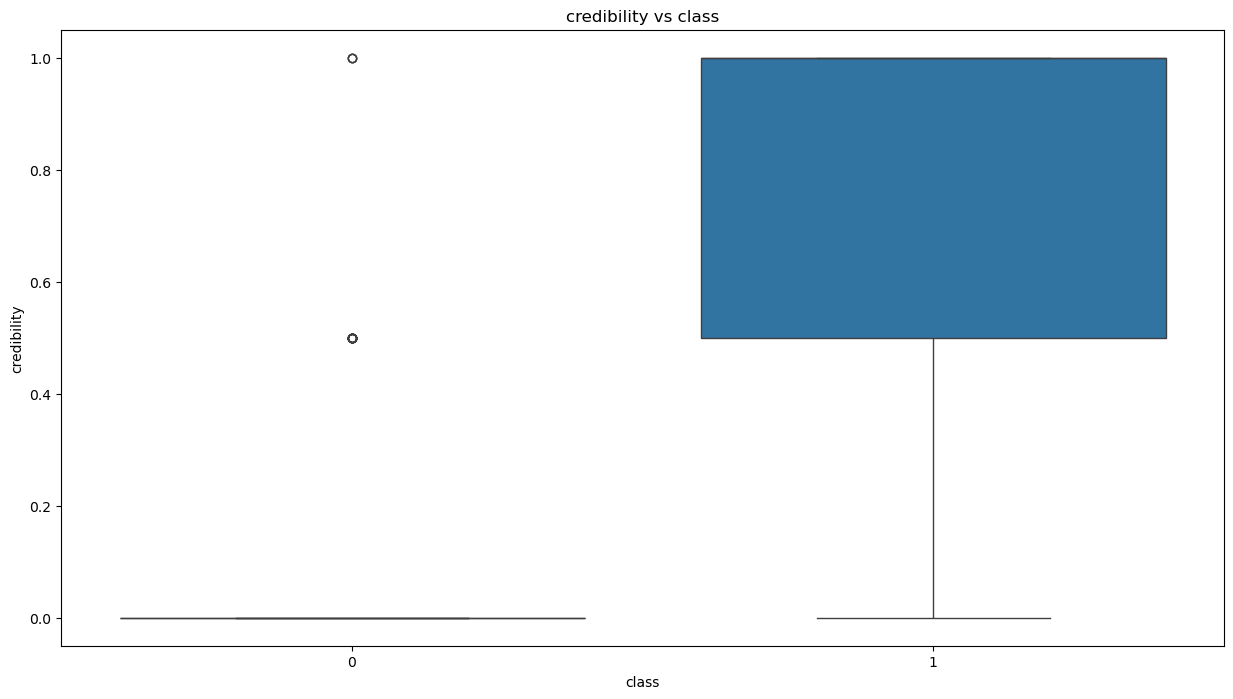

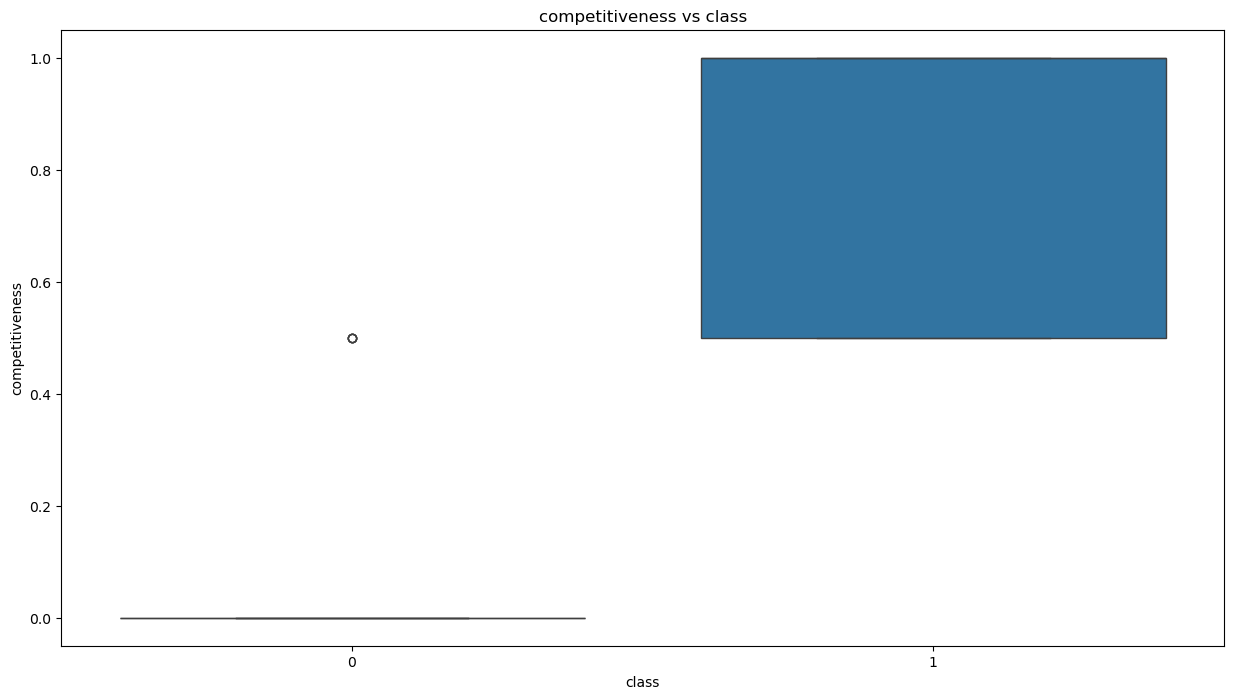

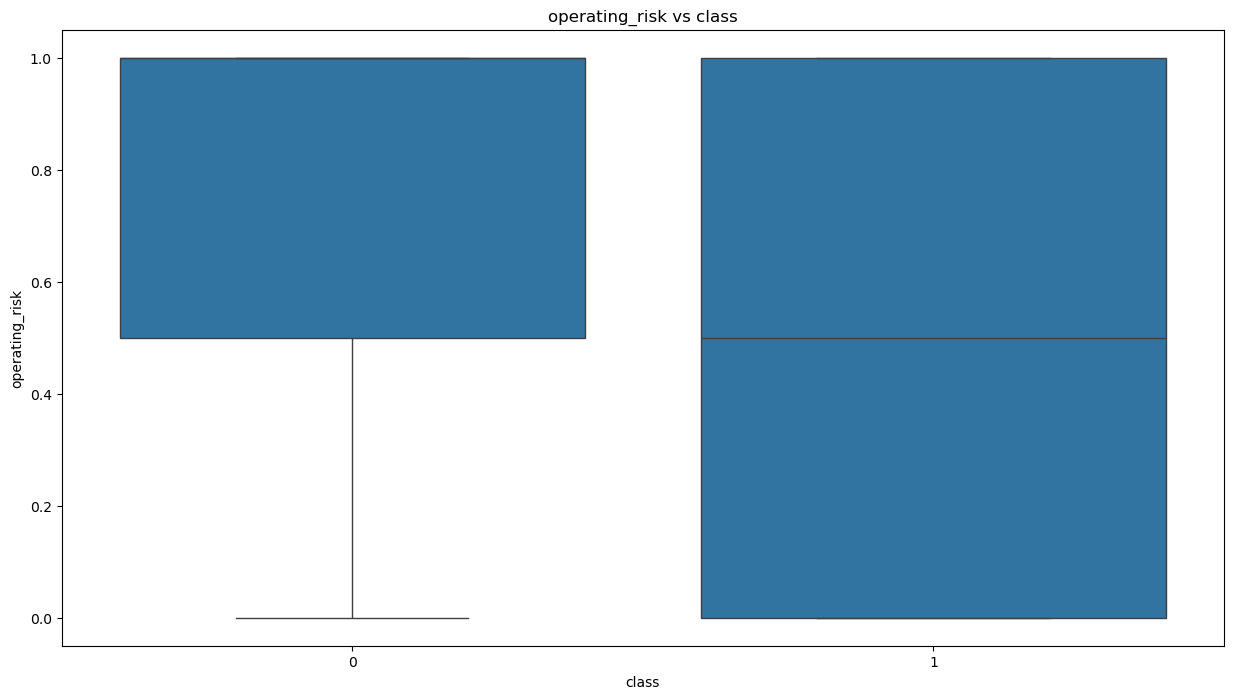

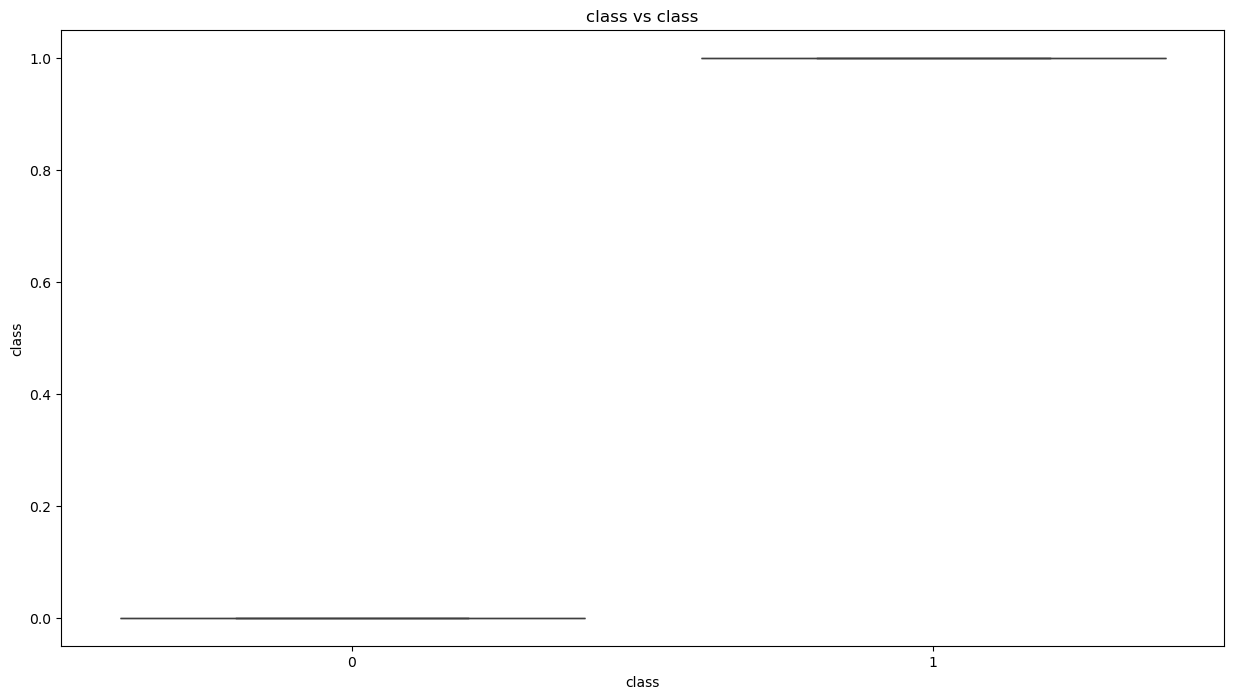

In [14]:
features=data.columns

for i in features:
    plt.figure(figsize=(15,8))
    sns.boxplot(data=data,x='class',y=i)
    plt.title(f'{i} vs class')
    plt.show()

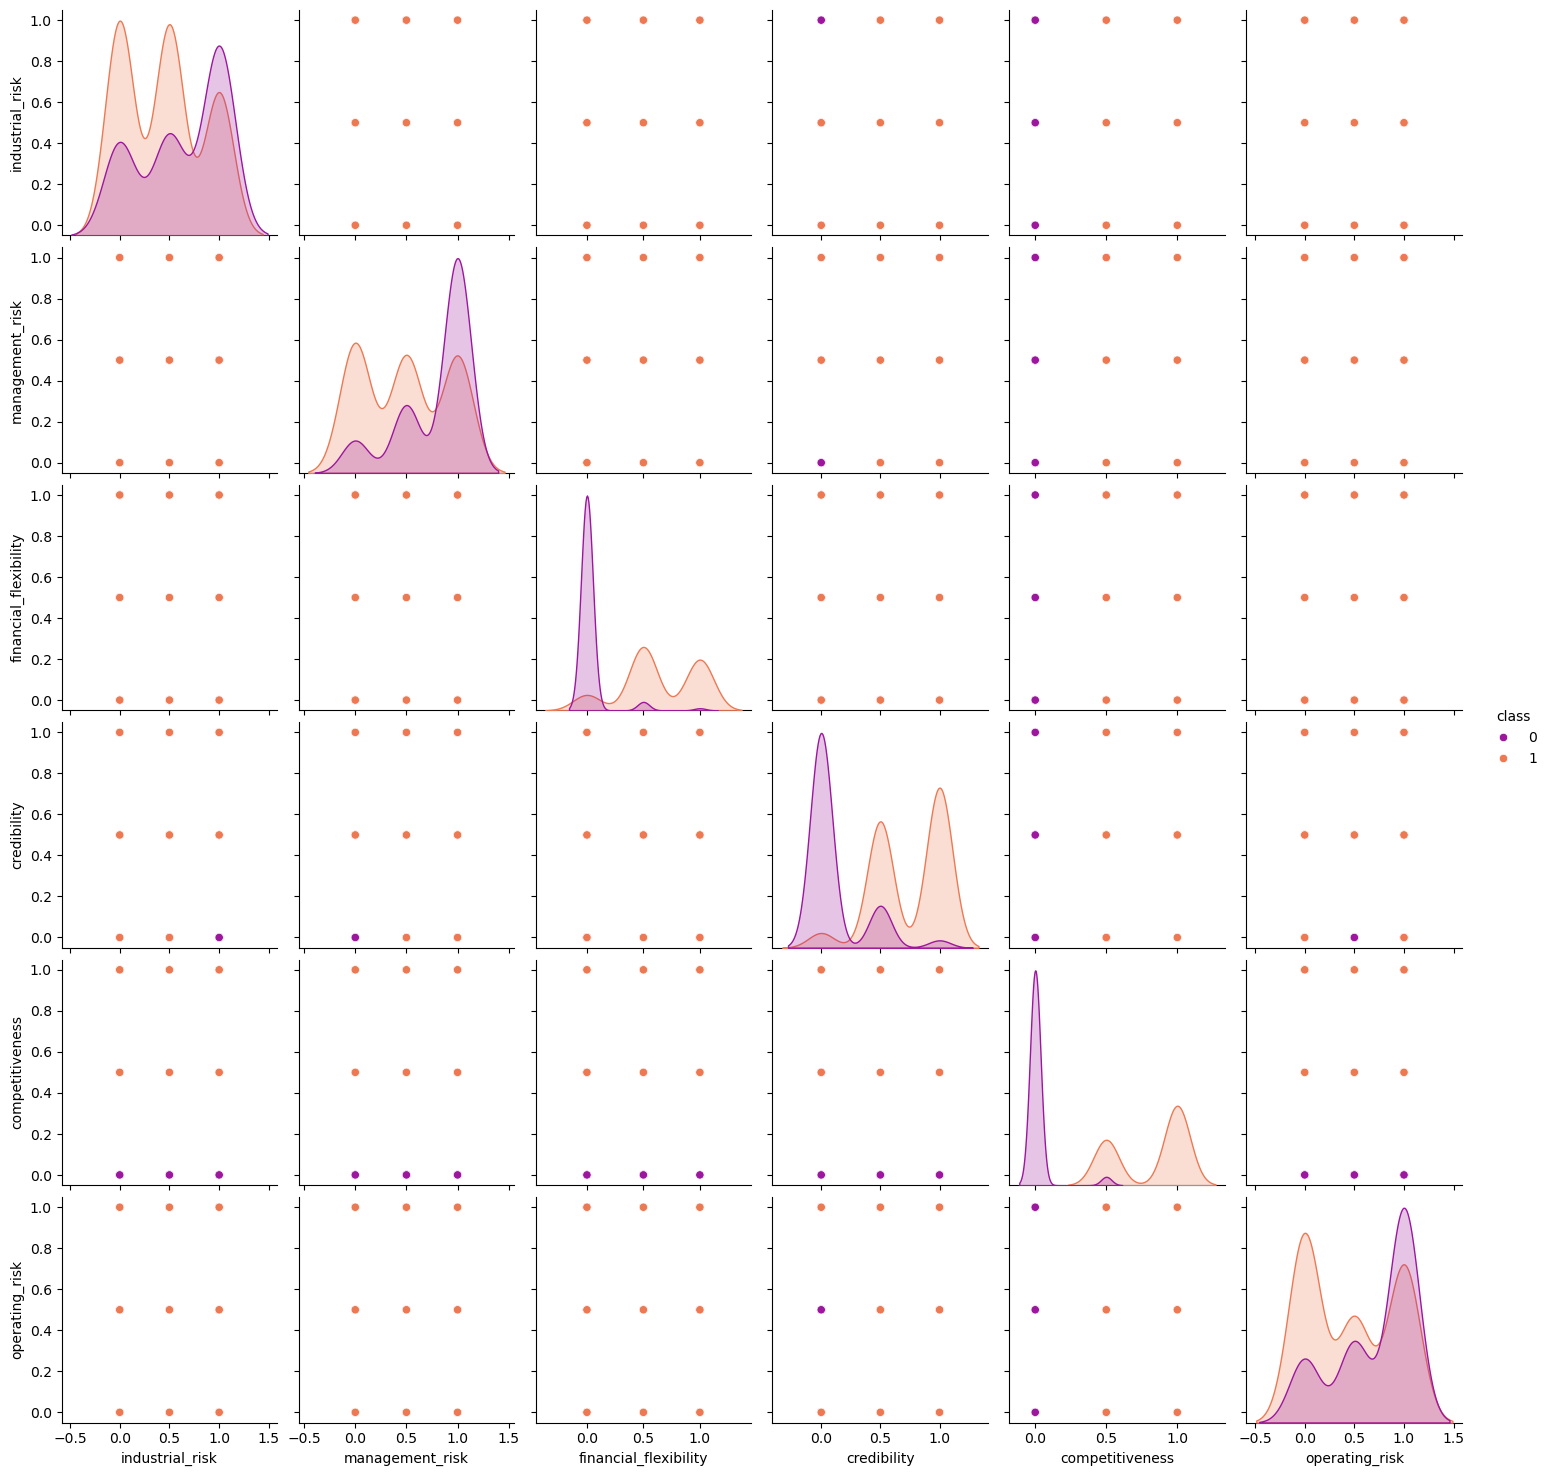

In [15]:
sns.pairplot(data,hue='class',diag_kind='auto',palette='plasma')
plt.show()

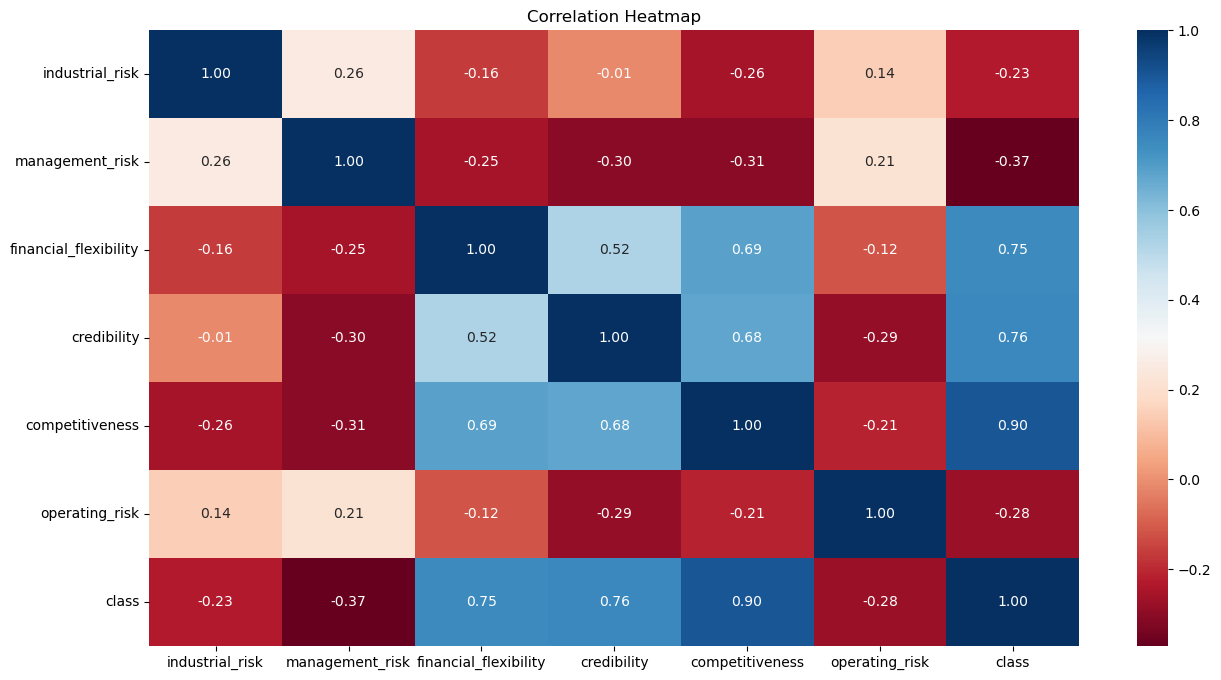

In [16]:
correlation=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation,annot=True,cmap='RdBu',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## SPLITING DATA

In [18]:
x=data.drop(columns=['class'])
y=data['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 6)
(50, 6)
(200,)
(50,)


### MODEL-1:SUPPORT VECTOR MACHINE

#### GRID SEARCH FOR MODEL-1

In [22]:
model=SVC()

params={
    'kernel' : ['rbf'],
    'C': [10, 0.1, 0.001],
    'gamma': [50, 5, 10, 0.5]
}
grid=GridSearchCV(estimator=model, param_grid=params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 0.1, 0.001], 'gamma': [50, 5, 10, 0.5],
                         'kernel': ['rbf']})

In [23]:
print('BEST SCORE:','\n',grid.best_score_)
print('BEST PARAMATERS:','\n',grid.best_params_)

BEST SCORE: 
 0.99
BEST PARAMATERS: 
 {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


#### MODEL-1 BUILDING

In [25]:
model_svm=SVC(C=10, gamma=0.5, kernel='rbf')
model_svm.fit(x_train,y_train)

SVC(C=10, gamma=0.5)

In [26]:
pred_svm=model_svm.predict(x_test)
pred_svm

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1])

#### MODEL-1 EVALUATION

In [28]:
model1_class=classification_report(y_test,pred_svm)
model1_accu=accuracy_score(y_test,pred_svm)
model1_con=confusion_matrix(y_test,pred_svm)

In [29]:
print('SVM MODEL CLASSIFICATION REPORT :','\n',model1_class)
print('SVM MODEL ACCURACY SCORE :',model1_accu)

SVM MODEL CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

SVM MODEL ACCURACY SCORE : 1.0


### MODEL-2:Logistic Regression

#### MODEL BUILDING

In [32]:
model_lr=LogisticRegression()
model_lr.fit(x_test,y_test)

LogisticRegression()

In [33]:
pred_lr=model_lr.predict(x_test)
pred_lr

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1])

#### MODEL EVALUATION

In [35]:
model2_class=classification_report(y_test,pred_lr)
model2_accu=accuracy_score(y_test,pred_lr)
model2_con=confusion_matrix(y_test,pred_lr)

In [36]:
print('Logistic Regression MODEL CLASSIFICATION REPORT :','\n',model2_class)
print('Logistic Regression MODEL ACCURACY SCORE :',model2_accu)

Logistic Regression MODEL CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Logistic Regression MODEL ACCURACY SCORE : 1.0


### MODEL-3:K-NEAREST NEIGHBOURS

#### GRID SEARCH FOR MODEL-3

In [40]:
model=KNeighborsClassifier()

params={
    'n_neighbors': [3, 5, 7, 9, 11],       
    'metric': ['euclidean', 'manhattan'] 
}
grid=GridSearchCV(estimator=model, param_grid=params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11]})

In [41]:
print('BEST SCORE:','\n',grid.best_score_)
print('BEST PARAMATERS:','\n',grid.best_params_)

BEST SCORE: 
 0.99
BEST PARAMATERS: 
 {'metric': 'euclidean', 'n_neighbors': 3}


#### MODEL BUILDING

In [45]:
model_knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [50]:
pred_knn=model_knn.predict(x_test)
pred_knn

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1])

#### MODEL EVALUATION

In [52]:
model3_class=classification_report(y_test,pred_knn)
model3_accu=accuracy_score(y_test,pred_knn)
model3_con=confusion_matrix(y_test,pred_knn)

In [53]:
print('K-NEAREST NEIGHBOURS MODEL CLASSIFICATION REPORT :','\n',model3_class)
print('K-NEAREST NEIGHBOURS MODEL ACCURACY SCORE :',model3_accu)

K-NEAREST NEIGHBOURS MODEL CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

K-NEAREST NEIGHBOURS MODEL ACCURACY SCORE : 1.0


## COMPARISION TABLE

In [55]:
# Define model names
models = ["SVM", "Logistic Regression", "K-Nearest Neighbors"]

# Define metrics
accuracy_scores = [1.0, 1.0, 1.0]
precision_scores = [1.00, 1.00, 1.00]  # Weighted avg precision
recall_scores = [1.00, 1.00, 1.00]     # Weighted avg recall
f1_scores = [1.00, 1.00, 1.00]         # Weighted avg F1-score
support_values = [50, 50, 50]          # Total support

# Create a DataFrame for comparison
comparison_table = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy_scores,
    "Weighted Precision": precision_scores,
    "Weighted Recall": recall_scores,
    "Weighted F1-Score": f1_scores,
    "Total Support": support_values
})


print(comparison_table)


                 Model  Accuracy  Weighted Precision  Weighted Recall  \
0                  SVM       1.0                 1.0              1.0   
1  Logistic Regression       1.0                 1.0              1.0   
2  K-Nearest Neighbors       1.0                 1.0              1.0   

   Weighted F1-Score  Total Support  
0                1.0             50  
1                1.0             50  
2                1.0             50  


## MODELS EVALUATION

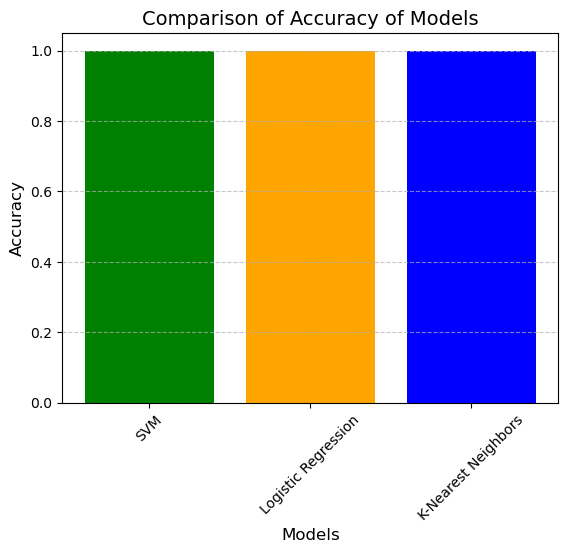

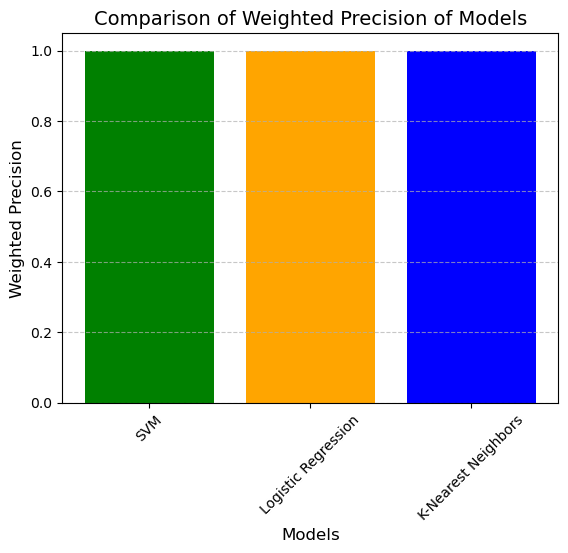

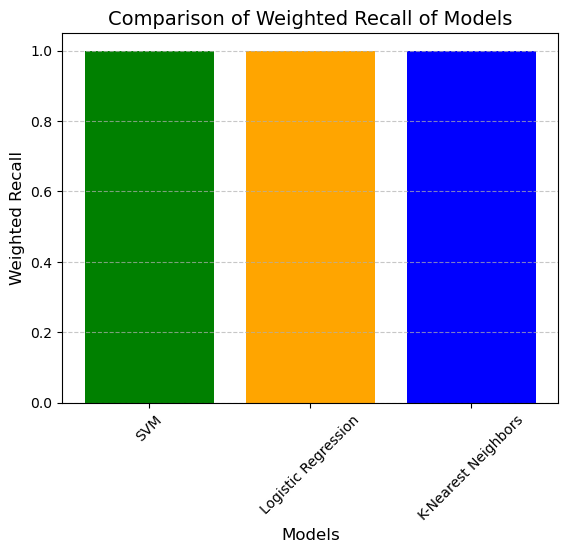

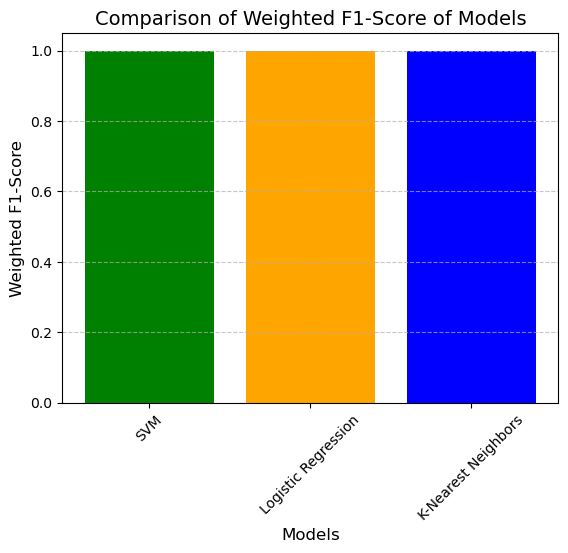

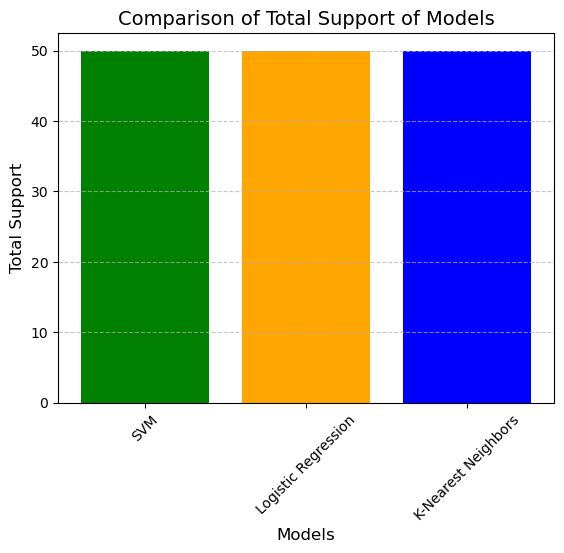

In [57]:
metrics=['Accuracy','Weighted Precision','Weighted Recall','Weighted F1-Score','Total Support']

for metric in metrics:
    plt.bar(comparison_table['Model'],comparison_table[metric],color=['green','orange','blue'])
    plt.title(f'Comparison of {metric} of Models', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.tick_params(axis='x', rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## DUMPING CODE

In [72]:
import pickle

In [76]:
pickle.dump(model_svm,open('model_svm.pkl','wb'))